In [2]:
# Step 1: Load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [3]:
# Load the dataset
from google.colab import files
uploaded = files.upload()

Saving wine.csv to wine.csv


In [5]:
df = pd.read_csv('wine.csv')

In [6]:
# Display basic information
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
# Step 2: Exploratory data analysis(EDA)

In [7]:
# Check for mmissing values
df.isnull().sum()

,0
Type,0
Alcohol,0
Malic,0
Ash,0
Alcalinity,0
Magnesium,0
Phenols,0
Flavanoids,0
Nonflavanoids,0
Proanthocyanins,0


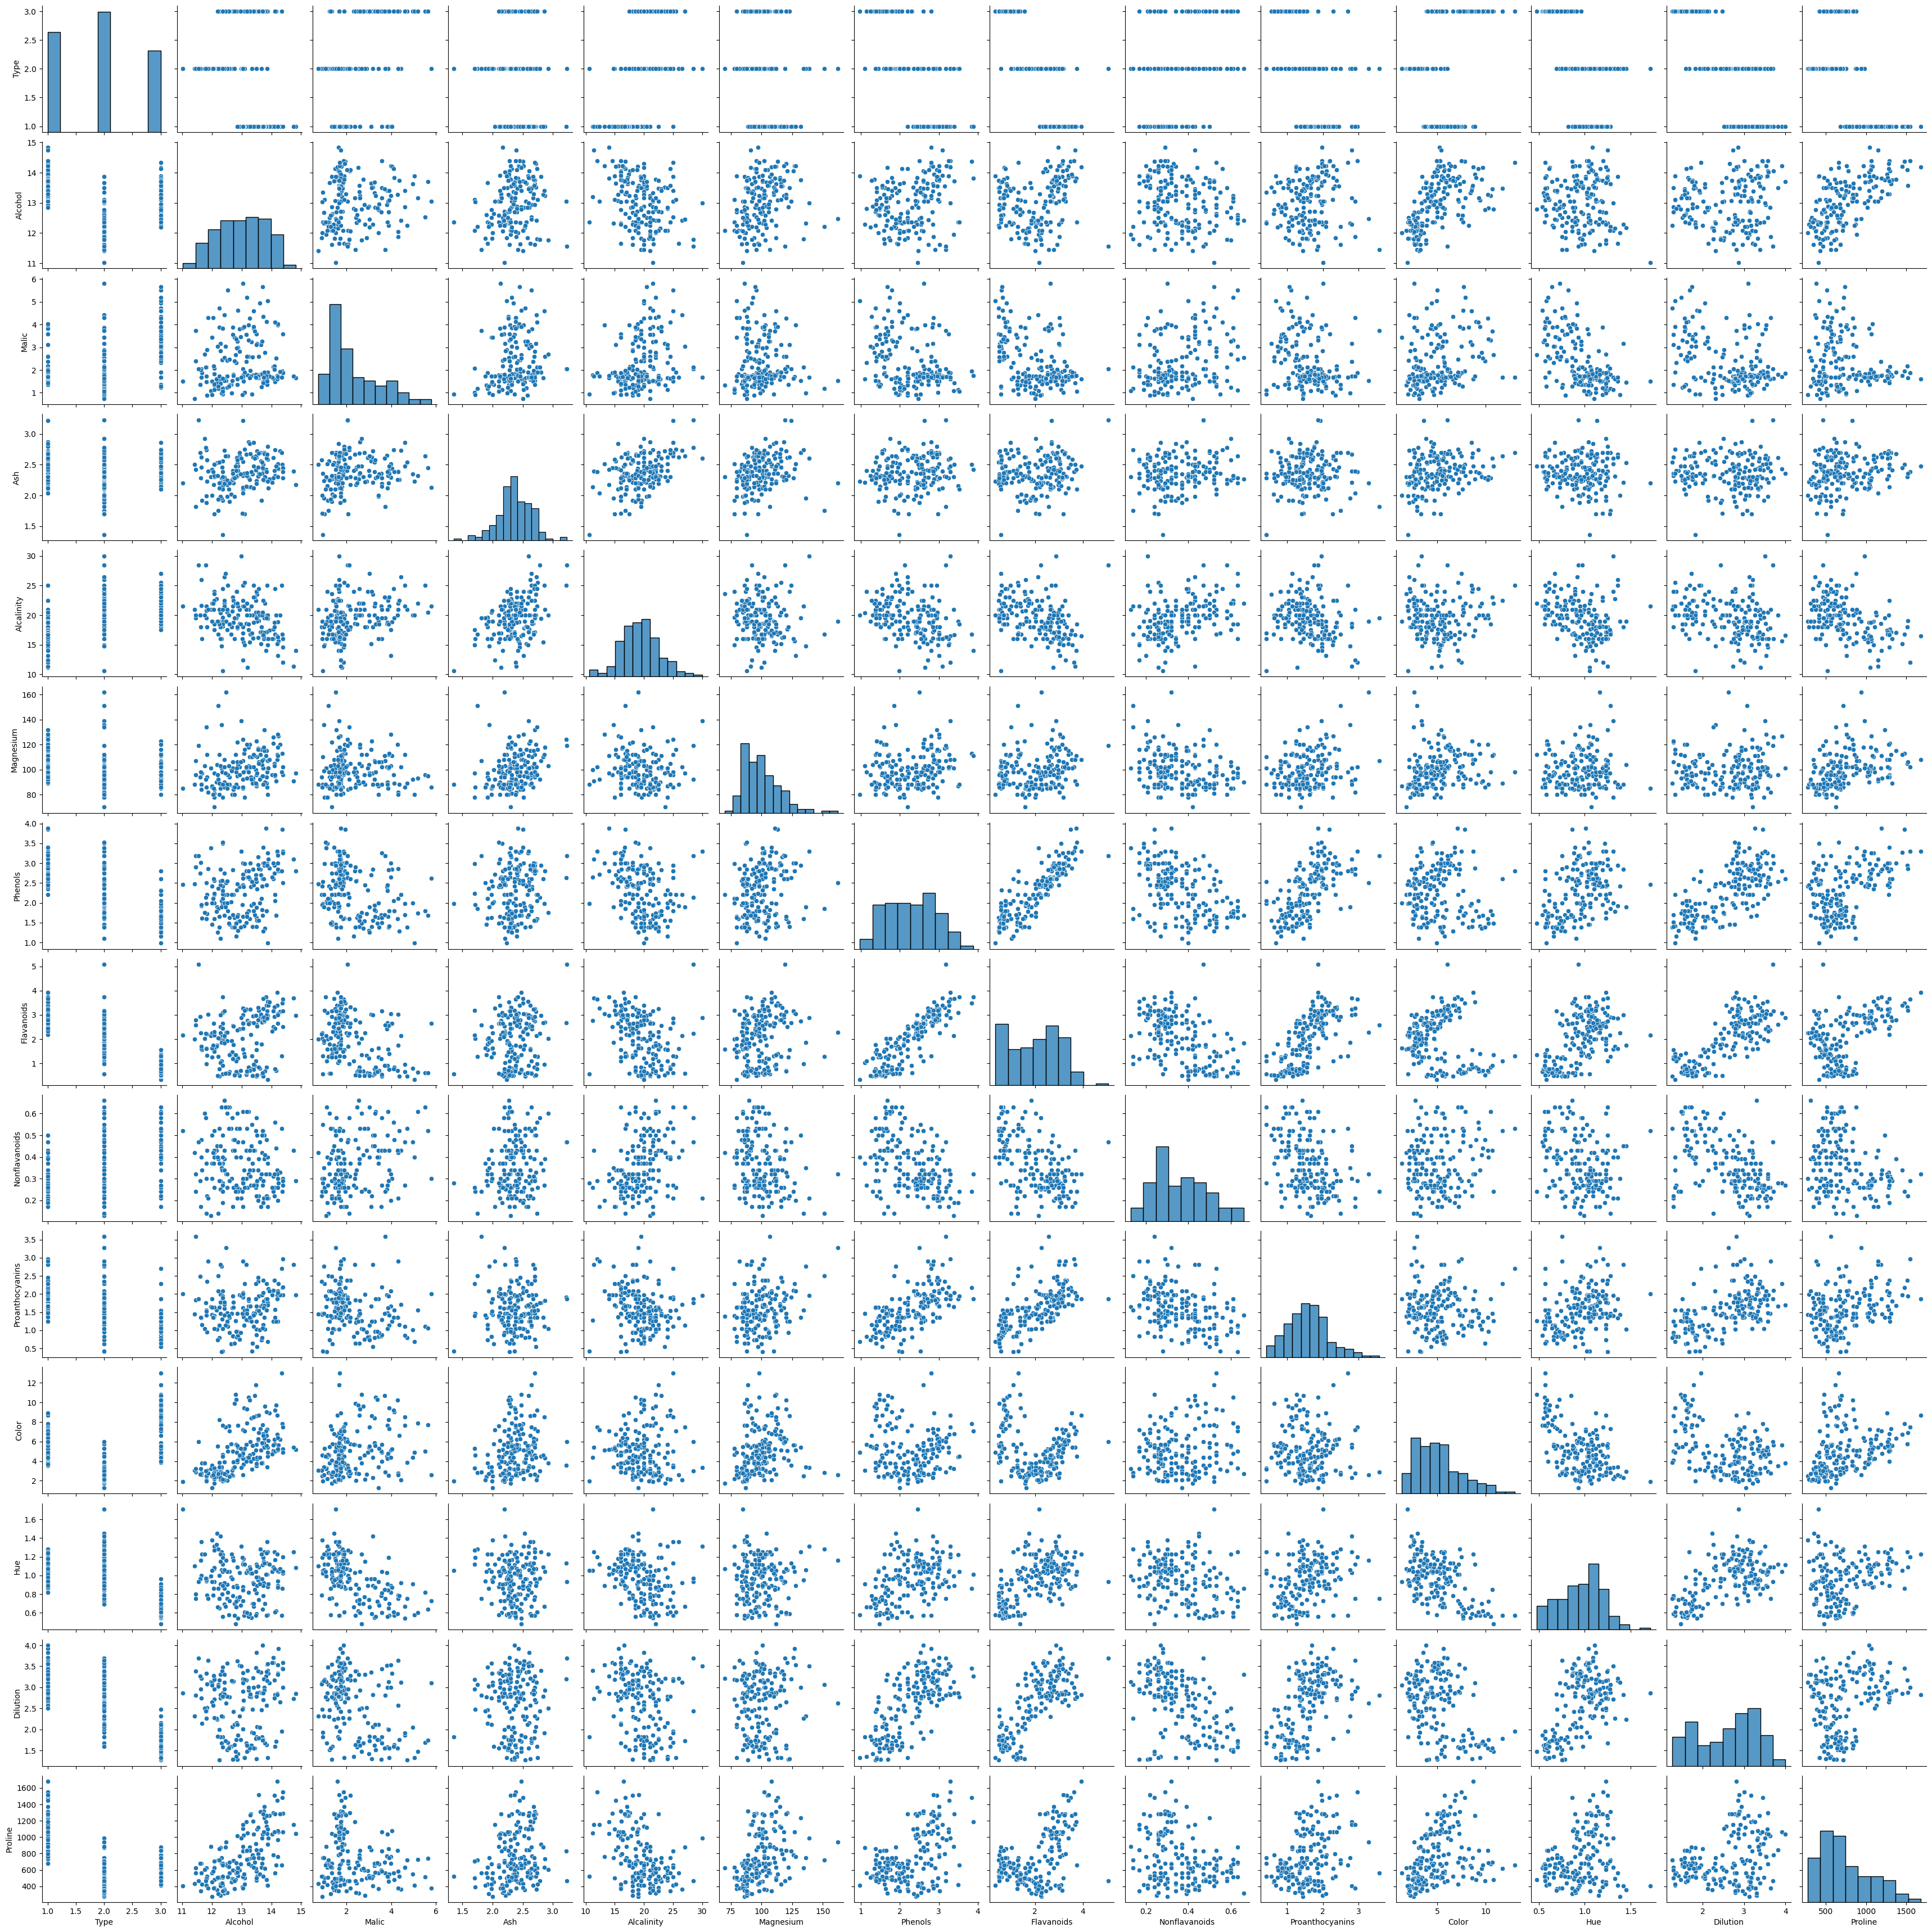

In [8]:
# Pairplot for feature visualization
sns.pairplot(df)
plt.show()

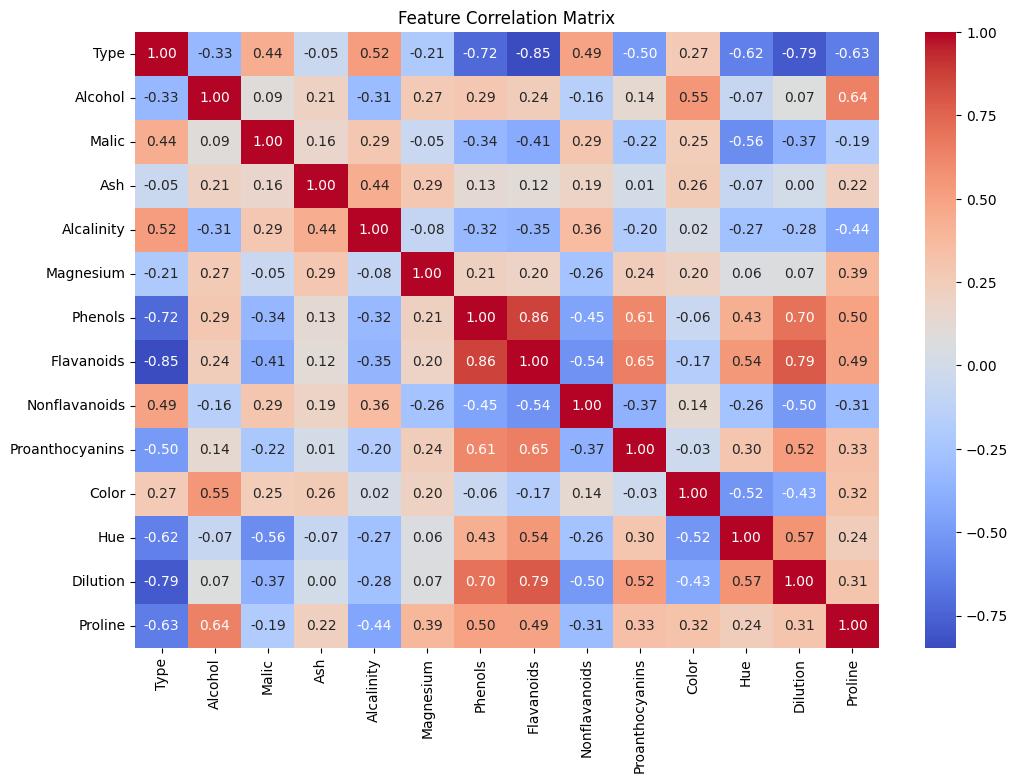

In [10]:
# Correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

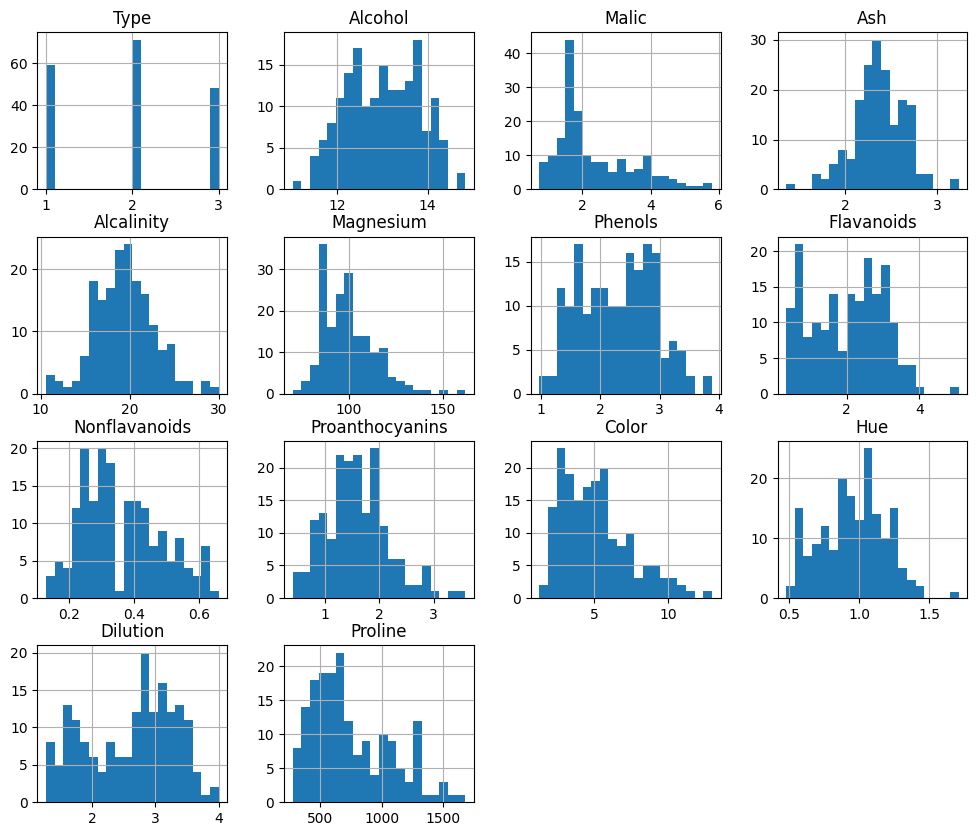

In [11]:
# Histograms of features
df.hist(figsize=(12,10), bins=20)
plt.show()

In [ ]:
# Step 3: Dimensionality reduction with PCA

In [12]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [13]:
# Apply PCA
pca = PCA()
pca_transformed = pca.fit_transform(scaled_data)

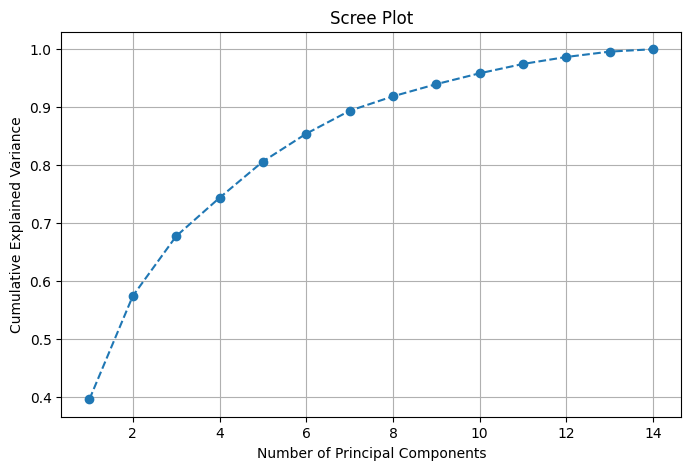

In [15]:
# Scree plot to determine the optimal number of components
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot")
plt.grid()
plt.show()

In [ ]:
# Interpretation: Select the nuber of principal components where the curve starts to flatten(elbow point).

In [ ]:
# Step 4: Clustering on original data

In [16]:
# Apply K-means clustering
kmeans_original = KMeans(n_clusters=3, random_state=42)
clusters_original = kmeans_original.fit_predict(scaled_data)

In [17]:
# Add cluster labels to the dataset
df["Cluster_Original"] = clusters_original

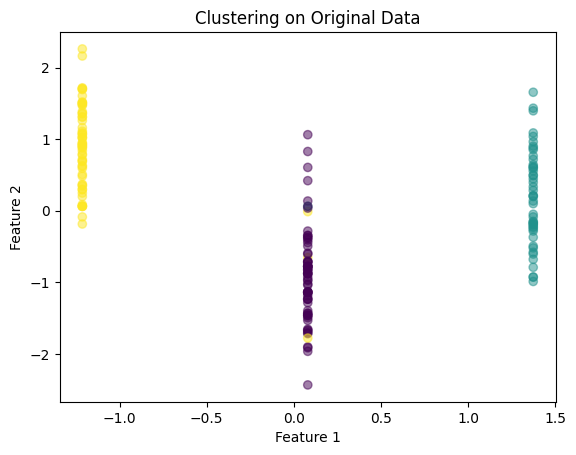

In [18]:
# Visualization of clusters
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters_original, cmap='viridis', alpha=0.5)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Clustering on Original Data")
plt.show()

In [19]:
# Evaluate clustering performance
sil_original = silhouette_score(scaled_data, clusters_original)
db_original = davies_bouldin_score(scaled_data, clusters_original)
print(f"Silhouette Score (Original Data): {sil_original}")
print(f"Davies-Bouldin Index (Original Data): {db_original}")

Silhouette Score (Original Data): 0.30648398324833453
Davies-Bouldin Index (Original Data): 1.315707552261773


In [ ]:
# Step 5: Clustering on PCA-Transformed data

In [20]:
# Select optimal number of principal components (eg, first 2)
pca_final = PCA(n_components=2)
pca_data = pca_final.fit_transform(scaled_data)

In [21]:
# Apply K-means clustering
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(pca_data)

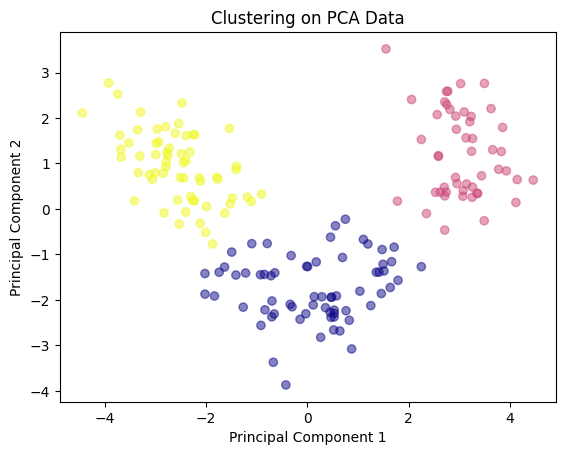

In [22]:
# Visualization of PCA clusters
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters_pca, cmap='plasma', alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Clustering on PCA Data")
plt.show()

In [23]:
# Evaluate clustering performance
sil_pca = silhouette_score(pca_data, clusters_pca)
db_pca = davies_bouldin_score(pca_data, clusters_pca)
print(f"Slihouette Score (PCA Data): {sil_pca}")
print(f"Davies-Bouldin Index (PCA Data): {db_pca}")

Slihouette Score (PCA Data): 0.6024415520362845
Davies-Bouldin Index (PCA Data): 0.5397078562575713


In [24]:
# Step 6: Comparision and insights
print(f"Silhouette Score Improvement: {sil_pca - sil_original}")
print(f"Davies-Bouldin Index Difference: {db_pca - db_original}")
if sil_pca > sil_original:
    print("PCA improved clustering performance.")
else:
    print("Clustering on original data performed better.")

Silhouette Score Improvement: 0.29595756878794993
Davies-Bouldin Index Difference: -0.7759996960042016
PCA improved clustering performance.


In [ ]:
# Conclusion
# 1. The comparison between clustering on original data vs. PCA-transformed data shows how dimensionality reduction affects clustering
# 2. If PCa improves the silhouette score and reduces the Davies-Bouldin index, it indicates better-defined clusters.
# 3. PCA is useful when dealing with high-dimensional data may lose some interpretability